In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
print(labels, data_list)
#오류나면 밑에 링크 참고
#https://coffee-with-me.tistory.com/16

[11.0, 3.0, 3.0, 3.0, 6.0, 1.0, 6.0, 5.0, 11.0, 6.0, 4.0, 2.0, 10.0, 5.0, 7.0, 1.0, 9.0, 1.0, 11.0, 4.0, 3.0, 6.0, 2.0, 2.0, 1.0, 3.0, 5.0, 6.0, 4.0, 10.0, 7.0, 7.0, 3.0, 7.0, 7.0, 7.0, 11.0, 3.0, 8.0, 9.0, 10.0, 9.0, 11.0, 3.0, 5.0, 3.0, 7.0, 9.0, 9.0, 6.0, 8.0, 4.0, 10.0, 11.0, 2.0, 9.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0, 7.0, 6.0, 1.0, 2.0, 10.0, 7.0, 11.0, 6.0, 4.0, 11.0, 3.0, 3.0, 7.0, 7.0, 11.0, 4.0, 6.0, 2.0, 9.0, 2.0, 7.0, 8.0, 5.0, 3.0, 9.0, 9.0, 4.0, 3.0, 4.0, 5.0, 7.0, 6.0, 5.0, 8.0, 3.0, 8.0, 8.0, 11.0, 9.0, 2.0, 4.0, 2.0, 6.0, 7.0, 8.0, 8.0, 1.0, 3.0, 8.0, 6.0, 2.0, 5.0, 7.0, 3.0, 1.0, 11.0, 11.0, 7.0, 3.0, 2.0, 11.0, 6.0, 2.0, 3.0, 10.0, 4.0, 8.0, 1.0, 4.0, 9.0, 10.0, 4.0, 11.0, 1.0, 7.0, 8.0, 10.0, 5.0, 11.0, 9.0, 7.0, 4.0, 4.0, 2.0, 9.0, 11.0, 3.0, 7.0, 9.0, 1.0, 1.0, 9.0, 11.0, 6.0, 2.0, 1.0, 8.0, 1.0, 7.0, 9.0, 10.0, 3.0, 1.0, 10.0, 10.0, 2.0, 11.0, 10.0, 4.0, 10.0, 2.0, 1.0, 5.0, 5.0, 1.0, 3.0, 11.0, 4.0, 1.0, 7.0, 5.0, 6.0, 7.0, 4.0, 2.0, 3.0, 2.0, 4.0, 4.0, 6.0, 11.0, 5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
print( data_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

# 2. 시계열 셋 크기 변경
size=256
result_ = TimeSeriesResampler(sz=size).fit_transform(result_scaled)

In [26]:
result_.shape

(1980, 256, 1)

In [27]:
data = result_.reshape(result_.shape[0], 1, size)
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

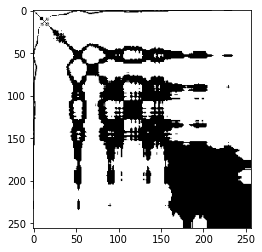

In [28]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')